In [1]:
%pip install pandas --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
simulation_params = {
    'test-runs': 5,
    'num-hosts': 20,
    'num-rsu': 1,
    'num-jammer': 1
}

In [5]:
# Load the two CSV files into pandas dataframes
df_old = pd.read_csv('./sumo_static/proactiveLegacyResults.txt')
df_new = pd.read_csv('./sumo_static/proactiveResults.txt')
df_snr = pd.read_csv('./sumo_static/proactiveSnrResults.txt')

# Recalculate accuracy for both old and new solutions
df_new['accuracy'] = ((df_new['tp'] + df_new['tn']) / (df_new['tp'] + df_new['fp'] + df_new['tn'] + df_new['fn'])) * 100
df_old['accuracy'] = ((df_old['tp'] + df_old['tn']) / (df_old['tp'] + df_old['fp'] + df_old['tn'] + df_old['fn'])) * 100
df_snr['accuracy'] = ((df_snr['tp'] + df_snr['tn']) / (df_snr['tp'] + df_snr['fp'] + df_snr['tn'] + df_snr['fn'])) * 100

# Add jammerType to the original dataframes
df_old['jammerType'] = 'proactive'
df_new['jammerType'] = 'proactive'
df_snr['jammerType'] = 'proactive'

# Combine all the dataframes

df_old['Solution'] = 'Old Solution'
df_new['Solution'] = 'New Solution'
df_snr['Solution'] = 'SNR Solution'


# Combine the dataframes
df_combined = pd.concat([df_old, df_new, df_snr])

num_runs = df_combined['runName'].nunique()
print(num_runs)
df_combined.head()

# Define the solution mapping
solution_mapping = {
    'Old Solution': 'NJS',
    'New Solution': 'NJS-M',
    'SNR Solution': 'T-SNR'
}

# Apply the mapping to the combined dataframe
df_combined['Solution'] = df_combined['Solution'].map(solution_mapping)

print(num_runs)
df_combined.head()

3
3


,runName,time,JLE,tp,fp,tn,fn,accuracy,ttfd,vSpeed,jammerType,Solution
0,1879422756,4.0,85.86081,1,0,3,0,100.0,4.0,NaN,proactive,NJS
1,1879422756,6.0,85.86081,1,0,5,0,100.0,4.0,NaN,proactive,NJS
2,1879422756,8.0,85.86081,1,0,7,0,100.0,4.0,NaN,proactive,NJS
3,1879422756,10.0,89.25990,2,0,8,0,100.0,4.0,NaN,proactive,NJS
4,1879422756,12.0,89.25990,2,0,10,0,100.0,4.0,NaN,proactive,NJS


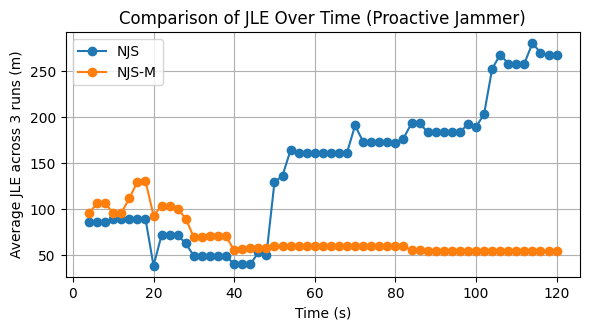

In [9]:
# Group by runName, time, Solution, and jammerType, and compute the mean JLE
df_grouped = df_combined.groupby(['runName', 'time', 'Solution', 'jammerType']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_pivot = df_grouped.pivot_table(values='JLE', index='time', columns=['Solution', 'jammerType'], aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 6))

# Plot for static jammer
plt.subplot(2, 1, 1)
plt.plot(df_pivot.index, df_pivot[('NJS', 'proactive')], label='NJS', marker='o')
plt.plot(df_pivot.index, df_pivot[('NJS-M', 'proactive')], label='NJS-M', marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Average JLE across {num_runs} runs (m)')
plt.title('Comparison of JLE Over Time (Proactive Jammer)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

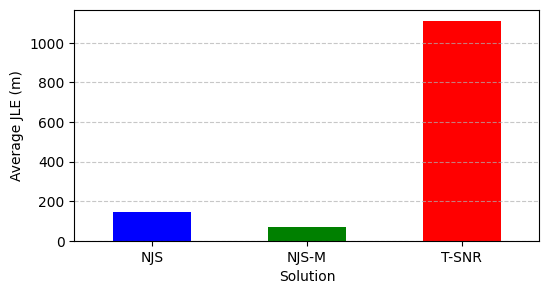

In [22]:
# Calculate the mean JLE for each solution
mean_jle = df_combined.groupby('Solution')['JLE'].mean()

# Plot the results in a bar chart
plt.figure(figsize=(6, 3))
mean_jle.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Solution')
plt.ylabel('Average JLE (m)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

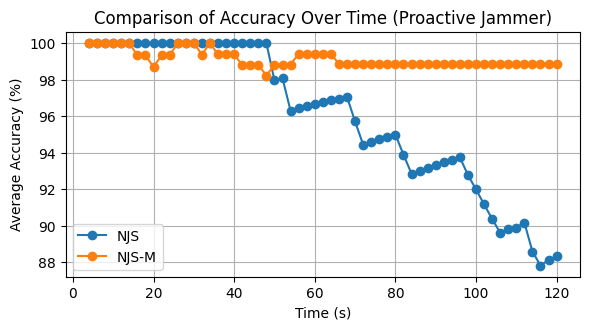

In [11]:
# Group by runName, time, Solution, and jammerType, and compute the mean accuracy
df_grouped = df_combined.groupby(['runName', 'time', 'Solution', 'jammerType']).mean().reset_index()

# Pivot the dataframe for easier plotting
df_pivot = df_grouped.pivot_table(values='accuracy', index='time', columns=['Solution', 'jammerType'], aggfunc='mean')

# Plot the data
plt.figure(figsize=(6, 6))

# Plot for static jammer
plt.subplot(2, 1, 1)
plt.plot(df_pivot.index, df_pivot[('NJS', 'proactive')], label='NJS', marker='o')
plt.plot(df_pivot.index, df_pivot[('NJS-M', 'proactive')], label='NJS-M', marker='o')
plt.xlabel('Time (s)')
plt.ylabel(f'Average Accuracy (%)')
plt.title('Comparison of Accuracy Over Time (Proactive Jammer)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

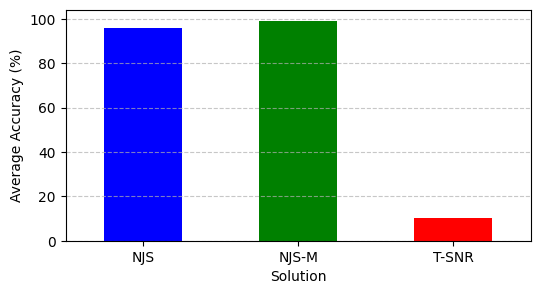

In [23]:
# Calculate the mean JLE for each solution
mean_acc = df_combined.groupby('Solution')['accuracy'].mean()

# Plot the results in a bar chart
plt.figure(figsize=(6, 3))
mean_acc.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Solution')
plt.ylabel('Average Accuracy (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Data for the bar chart
categories = ['NJS-M', 'NJS', 'T-SNR']
values = [4, 4, 4]

# Create the bar chart
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Time-To-First-Detection (s)')
plt.title('Comparison of TTFD Between Systems')

# Display the chart
plt.show()


In [ ]:
# Data for the bar chart
categories = ['NJS-M', 'NJS', 'T-SNR']
values = [8.286, 8.268, 26.286]

# Create the bar chart
plt.bar(categories, values, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Network Overhead (Kb/second)')
plt.title('Network Overhead of each Node (sampling every 7ms)')

# Display the chart
plt.show()
